# Exploring Titanic Dataset

![](https://media.giphy.com/media/OJw4CDbtu0jde/giphy.gif)

>The objective of this notebook is to explain each steps and decision we take during solution and development of Titanic Dataset in Kaggle Competitions.

In [1]:
#collapse-show
# data analysis
import pandas as pd
import numpy as np
import random as rnd

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
#collapse-hide
pd.options.display.max_columns = 100

## 1.Reading data
>The Python Pandas packages helps us work with our datasets. We start by acquiring the training and testing datasets into Pandas DataFrames. We also combine these datasets to run certain operations on both datasets together.

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
df = [train, test]

## 2.Exploratory Data Analysis
>Here we have to analyze and investigate data sets and summarize their main characteristics.

In [4]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### We can classify data into : 1.Categorical and Numerical

* Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.  
* Numerical: Age, Fare. Discrete: SibSp, Parch.

In [6]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [7]:
train.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

* Name contains Titles(eg. Mr,Mrs,Miss etc)
* Ticket coloumn contains alphanumeric data.
* Cabin is also alphanumeric.

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


* In training dataset Cabin,Age,Embarked features contain a number of null values.
* In testing dataset Cabin,Age contain a number of null values.

In [10]:
((train.isnull().sum()/len(train))*100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [11]:
((test.isnull().sum()/len(test))*100)

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [12]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [13]:
test.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

In [14]:
train.describe(include=['O'])

Name   Sex  Ticket    Cabin Embarked
count                               891   891     891      204      889
unique                              891     2     681      147        3
top     Foreman, Mr. Benjamin Laventall  male  347082  B96 B98        S
freq                                  1   577       7        4      644

In [15]:
test.describe(include=['O'])

Name   Sex    Ticket            Cabin Embarked
count                         418   418       418               91      418
unique                        418     2       363               76        3
top     Carlsson, Mr. Carl Robert  male  PC 17608  B57 B59 B63 B66        S
freq                            1   266         5                3      270

* Names are unique,Total 891 unique names,
* 65% of data are male.
* Cabin values have several dupicates. Meaning lot of people shared a cabin.
* Embarked takes three possible values. 
* S port used by most passengers. //Southampton
* Ticket feature has 22% of duplicate values

In [16]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', 
                                                                                     ascending=False)

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

In [17]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Sex  Survived
0  female  0.742038
1    male  0.188908

In [18]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

In [19]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', 
                                                                                      ascending=False)

Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000

* Pclass We observe significant correlation (>0.5) among Pclass=1 and Survived.
* Sex We confirm the observation during problem definition that Sex=female had very high survival rate at 74%.
* SibSp and Parch These features have zero correlation for certain values.

## 3.Data Visualization
> Visualization of data can reveal many insights that can help us in determining features in modelling.

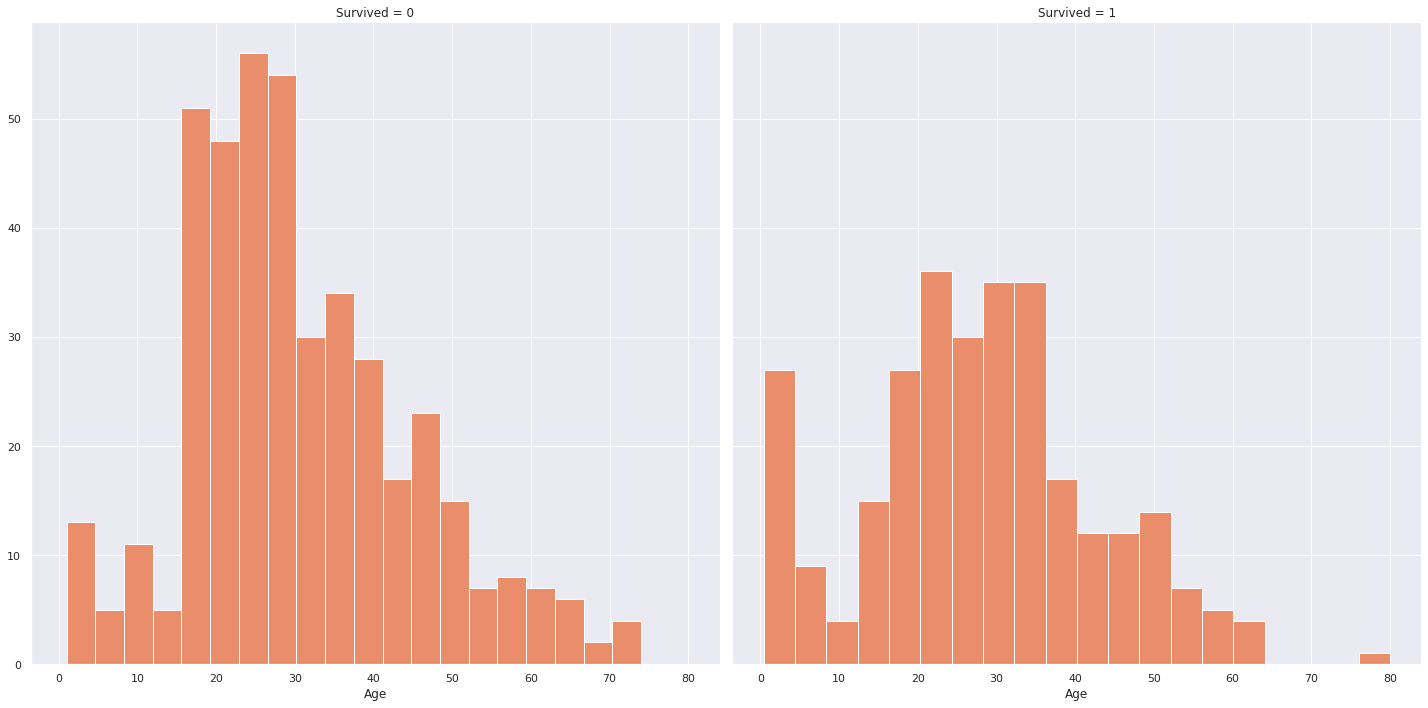

In [20]:
sns.set(palette = "flare")
grid = sns.FacetGrid(train, col='Survived',height = 10)
grid.map(plt.hist, 'Age', bins=20)

* Most passengers are in 15-35 age range.
* Children aged <=4 had a high survival rate.
* Oldest passengers aged above 80 survived.
* Large number of 15-25 year olds did not survive.
* Age is an important feature.

/home/jithin/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


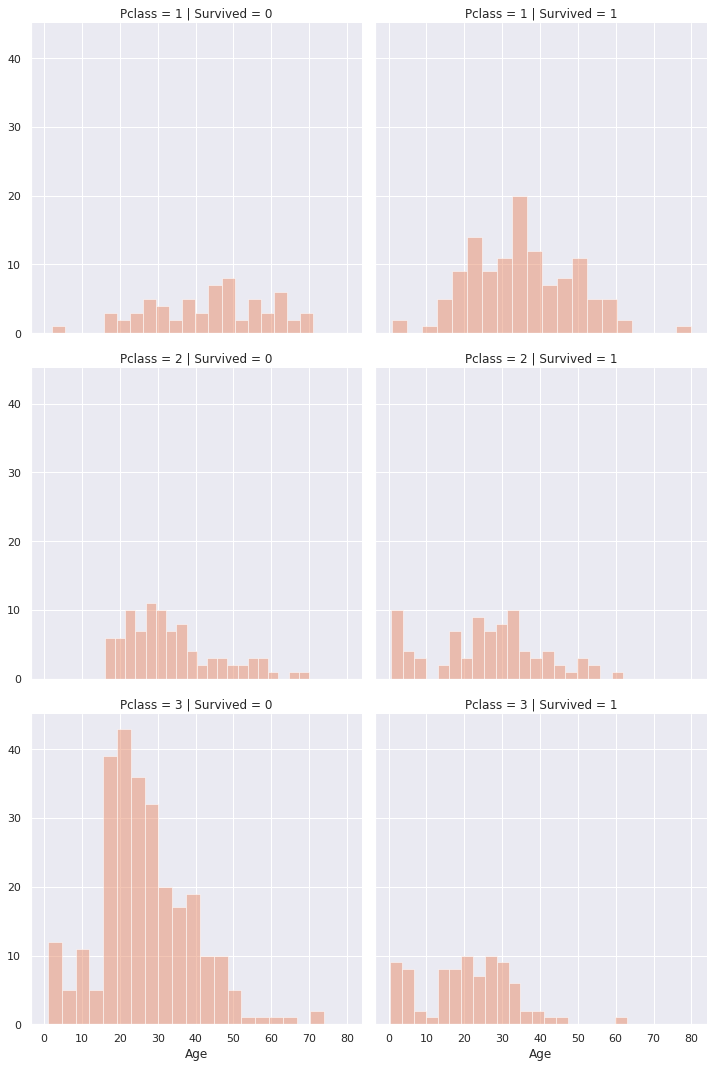

In [21]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=5)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

* Pclass=3 had most passengers, however most did not survive. 
* Child passengers in Pclass=2 and Pclass=3 mostly survived. 
* Most passengers in Pclass=1 survived. 
* Pclass varies in terms of Age distribution of passengers.

/home/jithin/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/jithin/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/jithin/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


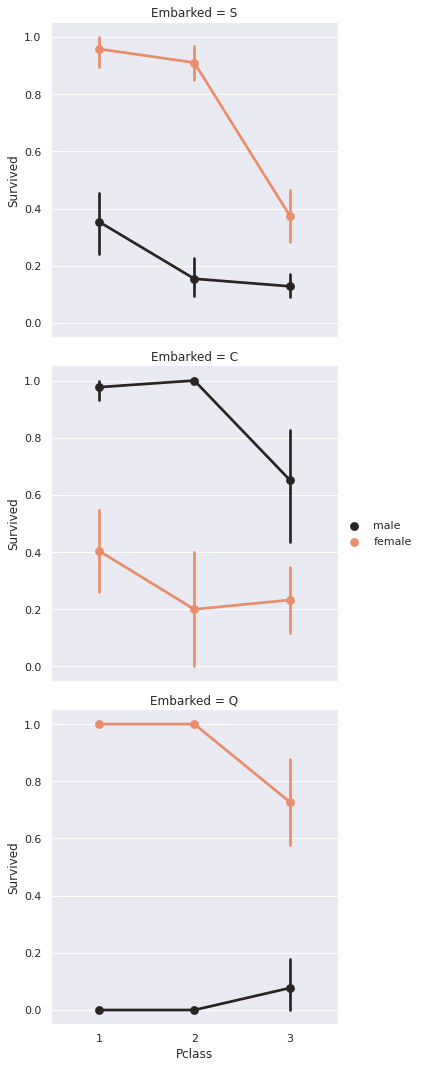

In [22]:
grid = sns.FacetGrid(train, row='Embarked', size=5)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
grid.add_legend()

* Female passengers had much better survival rate than males.
* In Embarked=C where males had higher survival rate.
* Males had better survival rate in Pclass=3 when compared with Pclass=2 for C and Q ports.
* Ports of embarkation have varying survival rates for Pclass=3 and among male passengers.

/home/jithin/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/jithin/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


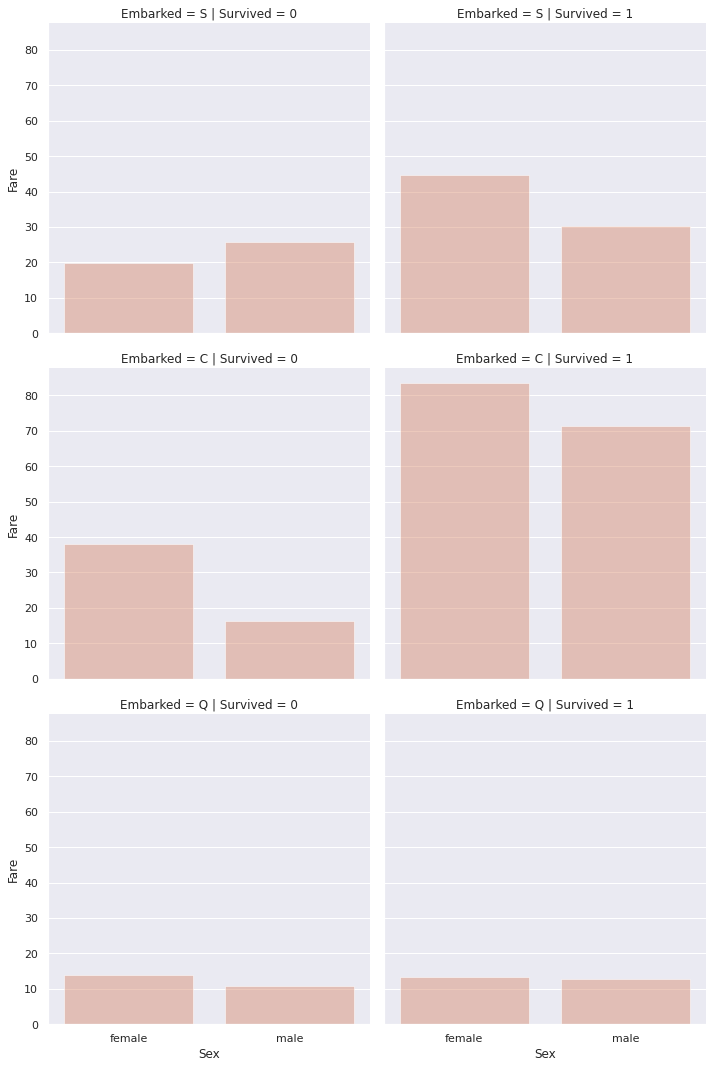

In [23]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived', size=5)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

* Higher fare paying passengers had better survival.
* Port of embarkation correlates with survival rates.

## 4.Feature Engineering

In [24]:
for dataset in df:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1

In [25]:
for dataset in df:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4   Other  0.347826

In [26]:
#Converting the categorical titles to ordinal.
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
for dataset in df:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  Title  
0      0         A/5 21171   7.2500   NaN        S      1  
1      0          PC 17599  71.2833   C85        C      3  
2      0  STON/O2. 3101282   7.9250   NaN        S      2  
3      0            113803  53.1000  C123        S      3  
4      0            373450   8.0500   NaN        S      1

In [27]:
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)
df = [train, test]
train.shape, test.shape
#Dropping the Name and PassengerID feature from training and testing datasets

((891, 11), (418, 11))

##### Converting Categorical Features

In [28]:
for dataset in df:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train.head()

Survived  Pclass  Sex   Age  SibSp  Parch            Ticket     Fare Cabin  \
0         0       3    0  22.0      1      0         A/5 21171   7.2500   NaN   
1         1       1    1  38.0      1      0          PC 17599  71.2833   C85   
2         1       3    1  26.0      0      0  STON/O2. 3101282   7.9250   NaN   
3         1       1    1  35.0      1      0            113803  53.1000  C123   
4         0       3    0  35.0      0      0            373450   8.0500   NaN   

  Embarked  Title  
0        S      1  
1        C      3  
2        S      2  
3        S      3  
4        S      1

/home/jithin/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


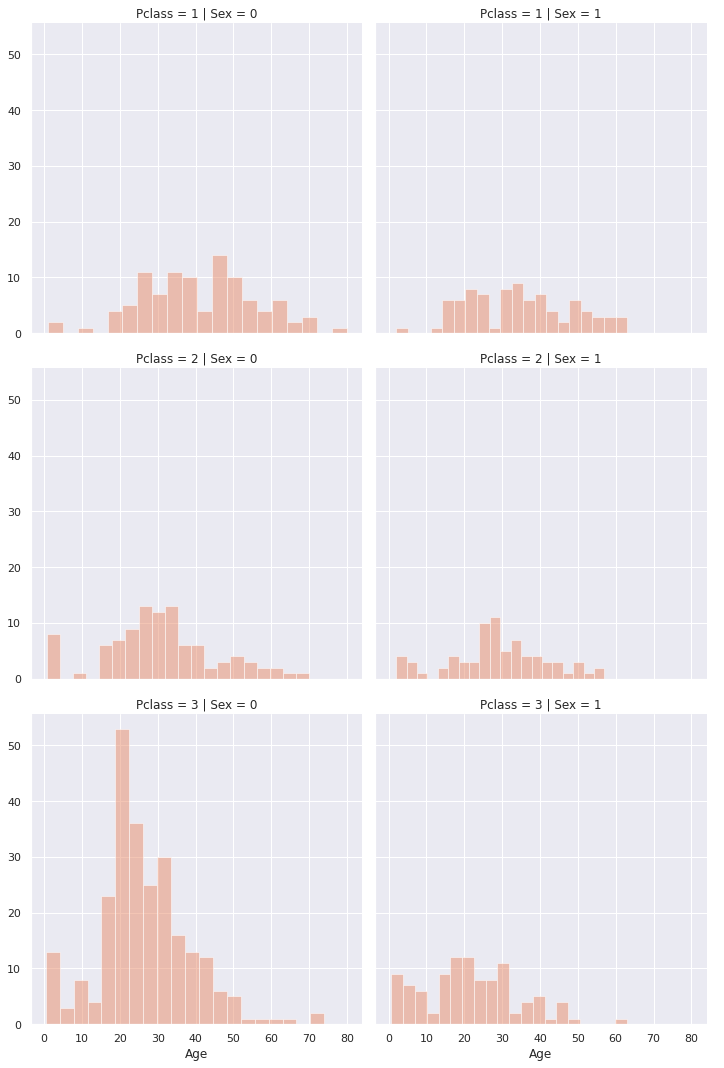

In [29]:
grid = sns.FacetGrid(train, row='Pclass', col='Sex', size=5)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [30]:
for dataset in df:
    dataset["Age"].fillna(dataset.groupby("Title")["Age"].transform("median"), inplace=True)

train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Title         0
dtype: int64

In [31]:
train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby(['AgeBand'],as_index=False).mean().sort_values(by='AgeBand', ascending=True)

AgeBand  Survived
0    (0.34, 16.336]  0.548077
1  (16.336, 32.252]  0.327345
2  (32.252, 48.168]  0.439024
3  (48.168, 64.084]  0.428571
4    (64.084, 80.0]  0.090909

Age values should be replaced as ordinals.

In [32]:
for dataset in df:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train.head()

Survived  Pclass  Sex  Age  SibSp  Parch            Ticket     Fare Cabin  \
0         0       3    0  1.0      1      0         A/5 21171   7.2500   NaN   
1         1       1    1  2.0      1      0          PC 17599  71.2833   C85   
2         1       3    1  1.0      0      0  STON/O2. 3101282   7.9250   NaN   
3         1       1    1  2.0      1      0            113803  53.1000  C123   
4         0       3    0  2.0      0      0            373450   8.0500   NaN   

  Embarked  Title           AgeBand  
0        S      1  (16.336, 32.252]  
1        C      3  (32.252, 48.168]  
2        S      2  (16.336, 32.252]  
3        S      3  (32.252, 48.168]  
4        S      1  (32.252, 48.168]

In [33]:
train = train.drop(['AgeBand'], axis=1) #removing AgeBand
df = [train, test]
train.head()

Survived  Pclass  Sex  Age  SibSp  Parch            Ticket     Fare Cabin  \
0         0       3    0  1.0      1      0         A/5 21171   7.2500   NaN   
1         1       1    1  2.0      1      0          PC 17599  71.2833   C85   
2         1       3    1  1.0      0      0  STON/O2. 3101282   7.9250   NaN   
3         1       1    1  2.0      1      0            113803  53.1000  C123   
4         0       3    0  2.0      0      0            373450   8.0500   NaN   

  Embarked  Title  
0        S      1  
1        C      3  
2        S      2  
3        S      3  
4        S      1

In [34]:
for dataset in df:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived',
                                                                                             ascending=False)

FamilySize  Survived
3           4  0.724138
2           3  0.578431
1           2  0.552795
6           7  0.333333
0           1  0.303538
4           5  0.200000
5           6  0.136364
7           8  0.000000
8          11  0.000000

In [35]:
for dataset in df:
    dataset['Alone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'Alone'] = 1

train[['Alone', 'Survived']].groupby(['Alone'], as_index=False).mean()

Alone  Survived
0      0  0.505650
1      1  0.303538

In [36]:
train = train.drop(['Parch', 'SibSp', 'FamilySize','Ticket','Cabin'], axis=1)
test = test.drop(['Parch', 'SibSp', 'FamilySize','Ticket','Cabin'], axis=1)
df = [train, test]

train.head()

Survived  Pclass  Sex  Age     Fare Embarked  Title  Alone
0         0       3    0  1.0   7.2500        S      1      0
1         1       1    1  2.0  71.2833        C      3      0
2         1       3    1  1.0   7.9250        S      2      1
3         1       1    1  2.0  53.1000        S      3      0
4         0       3    0  2.0   8.0500        S      1      1

In [37]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    2
Title       0
Alone       0
dtype: int64

In [38]:
mode = train.Embarked.dropna().mode()[0]
for dataset in df:
    dataset['Embarked'] = dataset['Embarked'].fillna(mode)
    
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', 
                                                                                         ascending=False)

Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009

Converting categorical values to numeric values

In [39]:
for dataset in df:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train.head()

Survived  Pclass  Sex  Age     Fare  Embarked  Title  Alone
0         0       3    0  1.0   7.2500         0      1      0
1         1       1    1  2.0  71.2833         1      3      0
2         1       3    1  1.0   7.9250         0      2      1
3         1       1    1  2.0  53.1000         0      3      0
4         0       3    0  2.0   8.0500         0      1      1

In [40]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Title       0
Alone       0
dtype: int64

In [41]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           1
Embarked       0
Title          0
Alone          0
dtype: int64

In [42]:
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)
test.head()

PassengerId  Pclass  Sex  Age     Fare  Embarked  Title  Alone
0          892       3    0  2.0   7.8292         2      1      1
1          893       3    1  2.0   7.0000         0      3      0
2          894       2    0  3.0   9.6875         2      1      1
3          895       3    0  1.0   8.6625         0      1      1
4          896       3    1  1.0  12.2875         0      3      0

In [43]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', 
                                                                                         ascending=True)


FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081

In [44]:
for dataset in df:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train = train.drop(['FareBand'], axis=1)
df = [train, test]
    
train.head()

Survived  Pclass  Sex  Age  Fare  Embarked  Title  Alone
0         0       3    0  1.0     0         0      1      0
1         1       1    1  2.0     3         1      3      0
2         1       3    1  1.0     1         0      2      1
3         1       1    1  2.0     3         0      3      0
4         0       3    0  2.0     1         0      1      1

In [45]:
test.head()

PassengerId  Pclass  Sex  Age  Fare  Embarked  Title  Alone
0          892       3    0  2.0     0         2      1      1
1          893       3    1  2.0     0         0      3      0
2          894       2    0  3.0     1         2      1      1
3          895       3    0  1.0     1         0      1      1
4          896       3    1  1.0     1         0      3      0

## Modelling
>Now we can train a model and predict the required solution.Best Model should be selected from these ML algorithms.
* Logistic Regression
* KNN or k-Nearest Neighbors
* Support Vector Machines
* Naive Bayes classifier
* Decision Tree
* Random Forrest

In [46]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [47]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

78.56

In [48]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

Feature  Correlation
1       Sex     2.148684
5     Title     0.413368
4  Embarked     0.313126
6     Alone     0.051407
2       Age    -0.032112
3      Fare    -0.037693
0    Pclass    -0.996006

In [49]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.34

In [50]:
#Knearestneighbours

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.84

In [51]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

76.99

In [52]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree


87.21

In [53]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

87.21

In [54]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest','Naive Bayes','Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

Model  Score
3            Random Forest  87.21
5            Decision Tree  87.21
1                      KNN  83.84
2      Logistic Regression  78.56
0  Support Vector Machines  78.34
4              Naive Bayes  76.99

In [55]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })

##### Any suggestions to improve our score are most welcome.

![](https://media.giphy.com/media/l0HlT86IOp6nE9he0/giphy.gif)


twitter: https://twitter.com/jithinharidaas/